## Credit Card Fraud Detection

#### Key Highlights: The best model we got using XGBoost with oversampled data
* Accuracy in the train dataset: 0.9963860506832211
* Accuracy in the test dataset: 0.9928197745865665
* ROC AUC in train dataset 0.9995835772061725
* ROC AUC in test dataset 0.9964037000562745

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score, train_test_split, cross_val_predict

from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.pipeline import Pipeline
from sklearn import linear_model, decomposition
#import lightgbm as lgb

from sklearn.metrics import r2_score, roc_auc_score

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve, auc

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading the csv file 
data = pd.read_csv('creditcard.csv')

In [3]:
data.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [4]:
#A statistical overview of the data
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
#Shape of the dataset
data.shape

(284807, 31)

In [6]:
#list of columns
print(list(data))

['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']


In [7]:
#identify numerical and non-numerical columns automatically
NonNumCols = []
NumCols = []

for col in list(data):
    if data[col].dtypes == 'object':
        NonNumCols.append(col)  
    else:
        NumCols.append(col)
print('Non-Numerical columns:\n',NonNumCols)

print('Numerical columns:\n',NumCols)

Non-Numerical columns:
 []
Numerical columns:
 ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']


* All the columns are numerical

In [8]:
#Checking null values
data.isnull().values.any() #there is no null value

False

In [9]:
#Percentage of regular and fraudulent activities
print('Fraud Percentage: {}'.format(round((data['Class'].value_counts()[1]/len(data))*100,2)))
print('Regular Percentage: {}'.format(round((data['Class'].value_counts()[0]/len(data))*100,2)))

Fraud Percentage: 0.17
Regular Percentage: 99.83


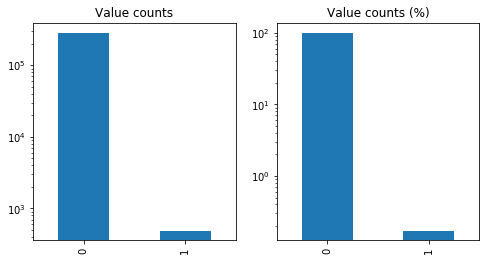

In [10]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
plt.title('Value counts')
data['Class'].value_counts().plot(kind='bar')

plt.yscale("log")

plt.subplot(1,2,2)
plt.title('Value counts (%)')
(data['Class'].value_counts()/len(data)*100).plot(kind='bar')

plt.yscale("log")
plt.show()

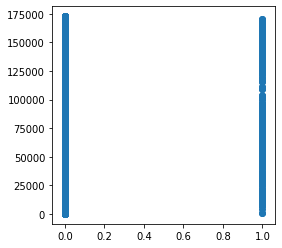

In [11]:
# Create a scatter plot to observe the distribution of classes with time
plt.figure(figsize=(4,4))
plt.scatter( data['Class'], data['Time'] )

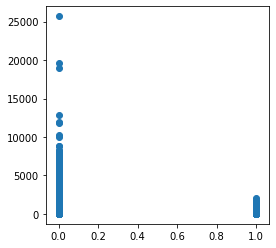

In [12]:
# Create a scatter plot to observe the distribution of classes with Amount
plt.figure(figsize=(4,4))
plt.scatter( data['Class'], data['Amount'] )

#### Scaling

In [13]:
#Scaling the 'Amount' and 'Time' columns
scaler = StandardScaler()
data['Amount']= scaler.fit_transform(data['Amount'].values.reshape(-1, 1))
data['Time']= scaler.fit_transform(data['Time'].values.reshape(-1, 1))

In [14]:
data.head(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996583,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,-1.996583,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0


In [15]:
#getting the X and y
data1 = data.copy()
y = data1.pop('Class')
X = data1

#### Train-Test Split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size=0.2, random_state=9)

#### Skewness

In [17]:
from scipy import stats
from scipy.stats import norm, skew

# Checking the skewness of all the features
skewed =  X_train.apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed})
skewness.head(10)


Skew in numerical features: 



,Skew
Amount,18.158344
V28,8.046011
V21,3.852093
V7,3.526254
V6,2.007451
V10,1.171398
V4,0.673142
V26,0.568361
V9,0.558281
V11,0.381464


In [18]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed features".format(skewness.shape[0]))

There are 30 skewed features


In [19]:
#list of highly skewed features
skewness.index

Index(['Amount', 'V28', 'V21', 'V7', 'V6', 'V10', 'V4', 'V26', 'V9', 'V11',
       'V19', 'V13', 'Time', 'V22', 'V18', 'V15', 'V25', 'V24', 'V27', 'V16',
       'V20', 'V14', 'V3', 'V12', 'V5', 'V1', 'V17', 'V2', 'V23', 'V8'],
      dtype='object')

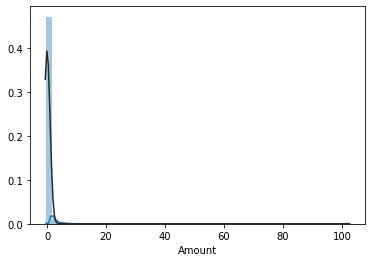

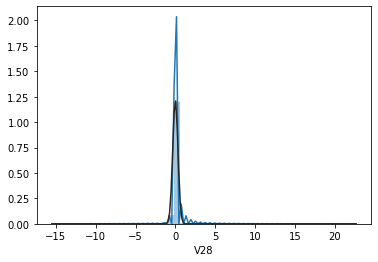

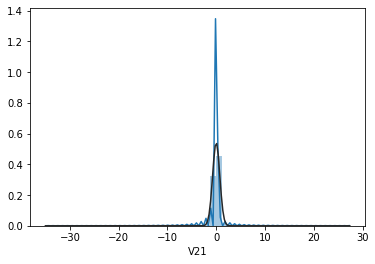

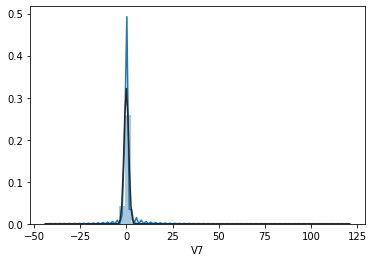

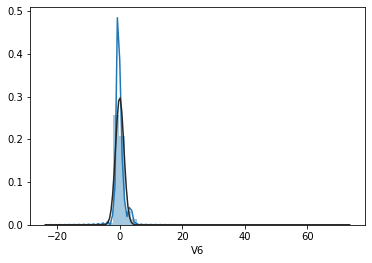

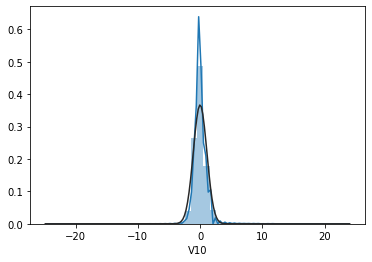

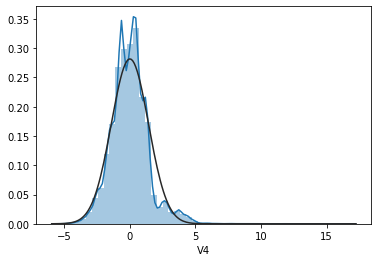

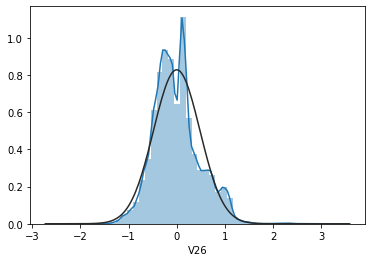

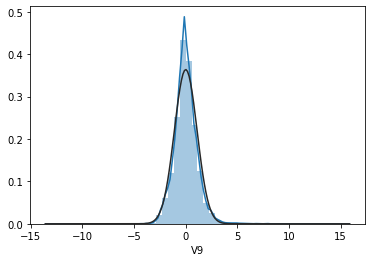

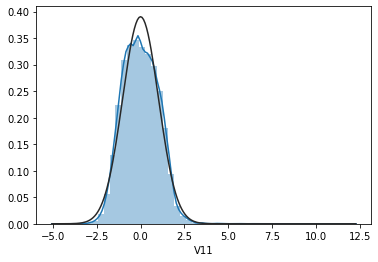

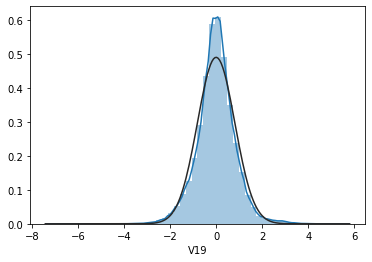

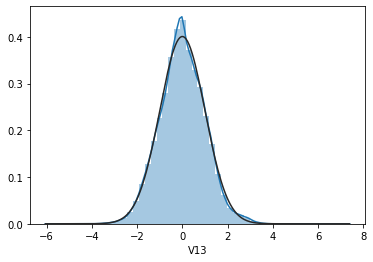

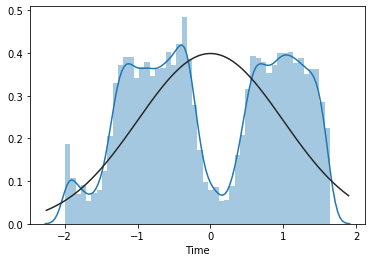

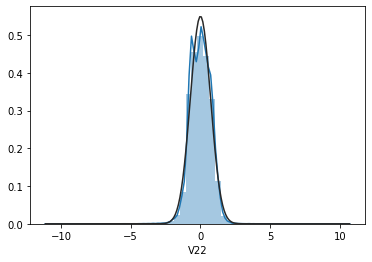

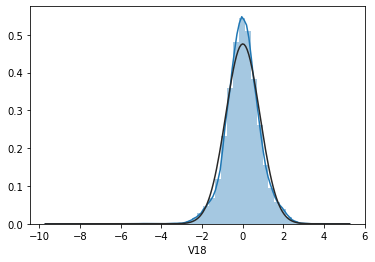

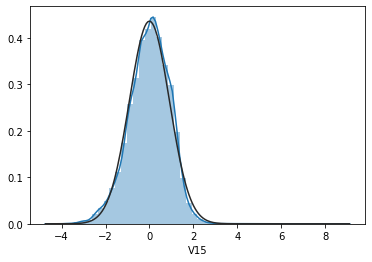

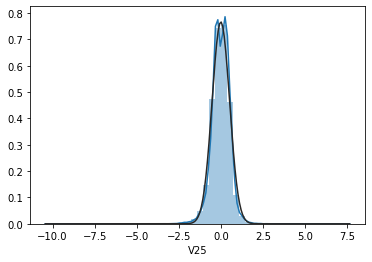

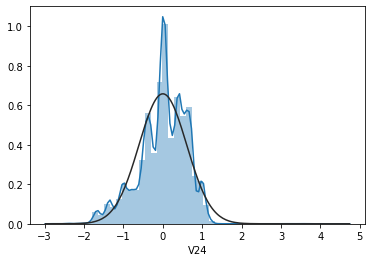

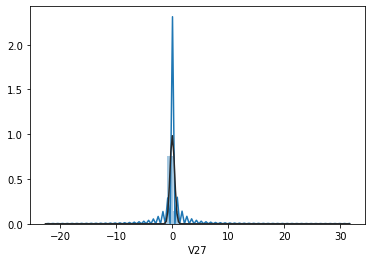

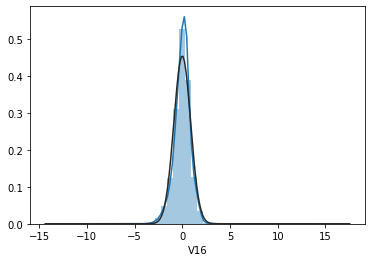

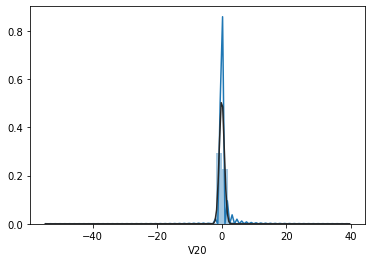

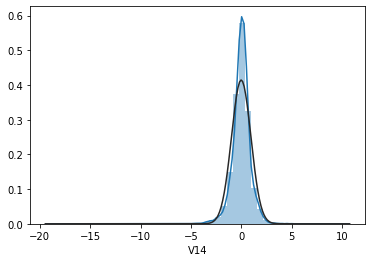

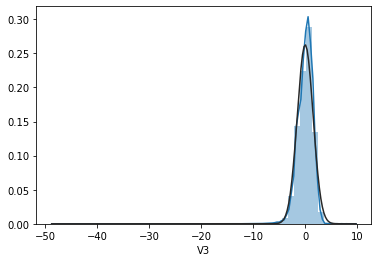

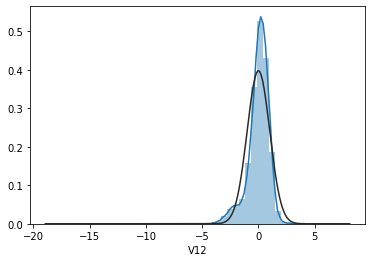

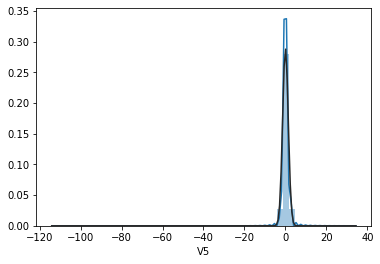

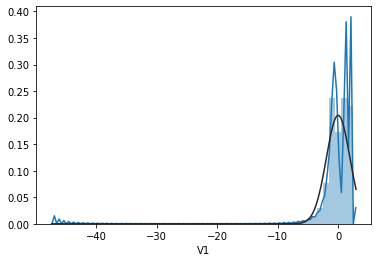

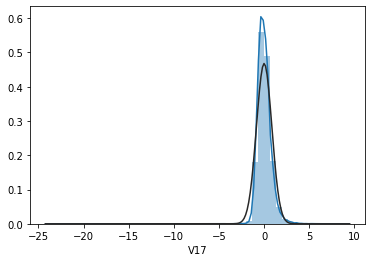

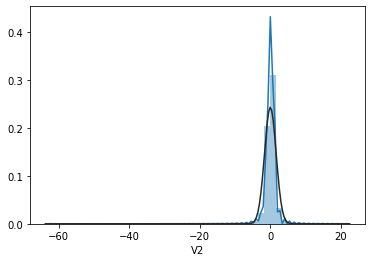

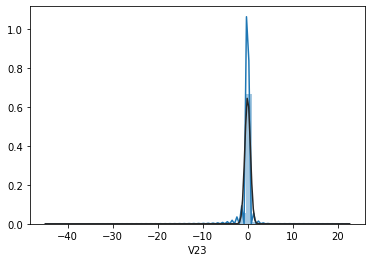

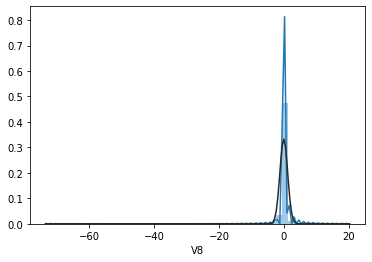

In [20]:
#distplot of the skewed features
for feat in skewness.index:
    sns.distplot(X_train[feat], fit=norm)
    plt.show()

#### Power Transformation

In [21]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
pt.fit(X_train)
X_train_pt = pt.transform(X_train)
X_test_pt = pt.transform(X_test)

In [22]:
X_train1 = pd.DataFrame(X_train_pt)
X_train1.columns = list(X_train)
X_train1.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,1.536666,-0.501297,0.731602,-0.430200,0.799643,0.228497,-0.566450,0.925934,0.099988,-0.613586,...,-0.237014,0.312038,0.695776,-0.165185,-0.297232,-0.118386,-0.783045,0.087162,0.371605,0.642296
1,0.991186,1.223014,-0.255643,-1.022533,0.835969,0.114296,-0.320318,0.172608,-0.183190,0.234562,...,-0.201180,0.465944,1.093790,-0.217771,-0.856295,0.454401,-0.881360,-0.072165,-0.153404,1.007250
2,-1.190731,-0.487814,0.139912,0.609638,-0.286333,0.867028,-0.150145,0.606591,-0.272056,-0.696071,...,0.426331,-0.510196,-1.532364,-0.039722,-1.318856,-0.903803,1.374110,-0.412479,-0.357587,-0.467296
3,-1.906454,-0.647688,1.414961,-0.441888,0.813477,0.026381,-0.514012,0.156097,0.535542,0.433892,...,-0.062498,0.126548,0.816933,0.245660,-0.001548,-1.263146,-0.875419,0.730409,0.494843,-0.993704
4,-0.845336,-0.645747,0.341552,0.613190,0.542182,0.967850,-1.197930,0.546555,-0.353179,-0.975826,...,0.491675,0.045558,0.073032,-0.283134,0.711994,-0.165964,0.810767,-0.266862,-0.203153,-1.048424


In [23]:
X_test1 = pd.DataFrame(X_test_pt)
X_test1.columns = list(X_test)
X_test1.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-0.918472,0.645466,-0.063416,0.614002,0.832794,-0.354729,0.346731,-0.397520,-0.003238,0.726599,...,-0.039687,-0.125415,-0.057912,-0.213473,-0.761364,1.109144,-0.731101,0.186442,0.112576,-0.731642
1,1.066643,-0.468786,0.385404,-0.366678,-1.196896,0.581487,-1.470075,1.230706,-0.512998,-0.021420,...,-0.336872,0.237402,0.678086,-0.705377,-0.001774,0.258644,1.910171,-0.294523,0.308064,-0.336518
2,1.437993,1.364633,-0.219604,-1.298029,0.335352,0.376813,-0.729958,0.553889,-0.517530,0.298823,...,-0.023453,0.047334,0.184368,-0.186219,-0.942954,0.563454,1.289161,-0.280657,-0.206158,0.899340
3,1.354941,-0.843283,0.162413,0.903973,-0.238027,0.452617,-0.616462,0.377711,-0.195193,0.761985,...,0.321472,0.046507,0.906683,-0.280489,-0.409932,2.242027,0.107289,0.539886,-0.421199,-0.584077
4,0.418799,-0.890945,0.419938,0.881404,-0.283283,-0.422588,-0.072081,-0.054304,-0.218565,1.288968,...,-0.631393,0.365564,0.657692,0.291453,-0.162519,-2.440294,-0.056332,-2.482319,1.133303,-0.666787


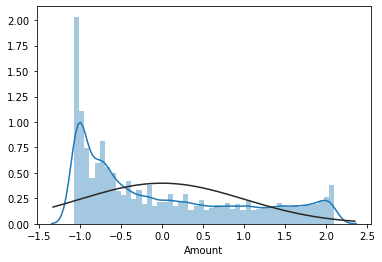

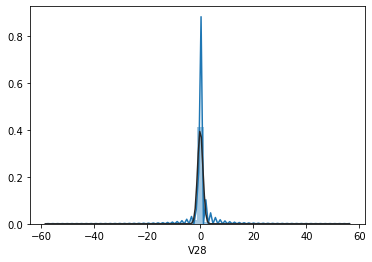

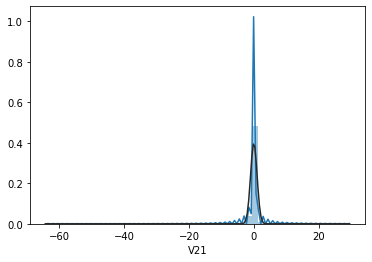

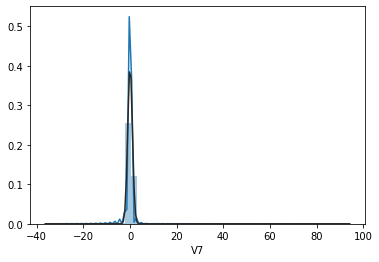

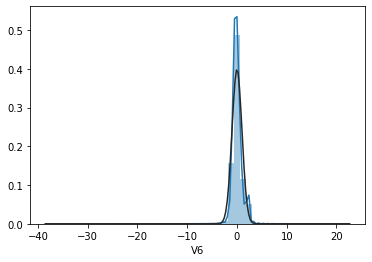

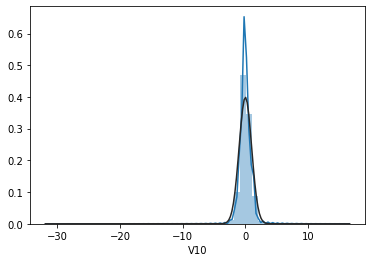

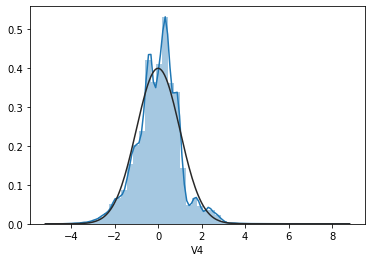

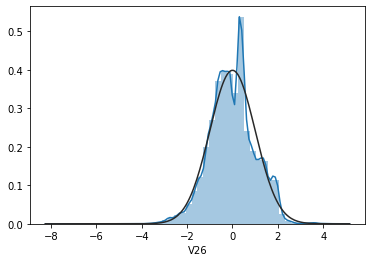

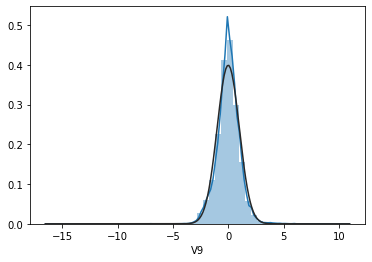

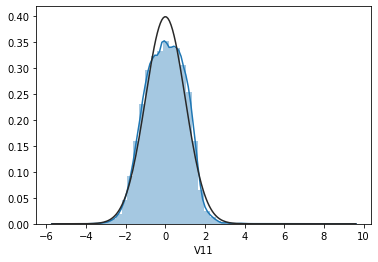

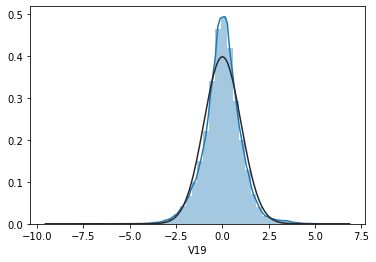

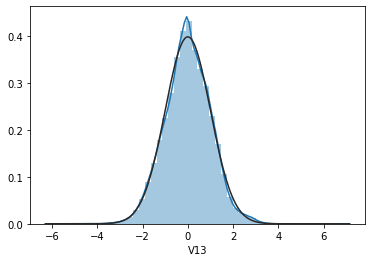

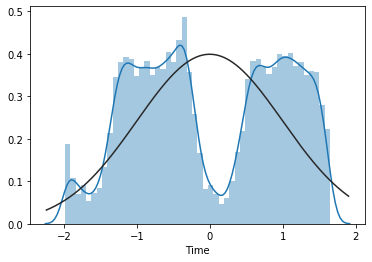

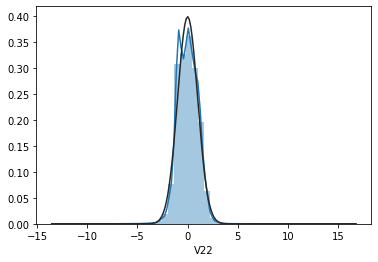

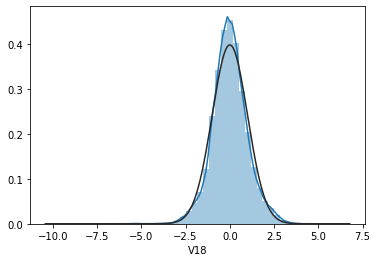

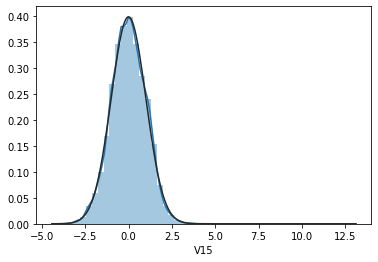

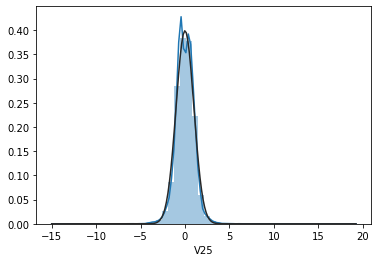

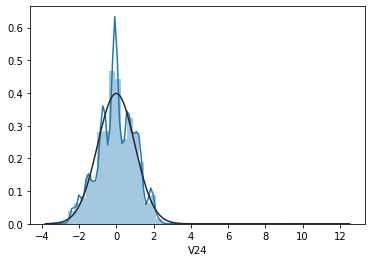

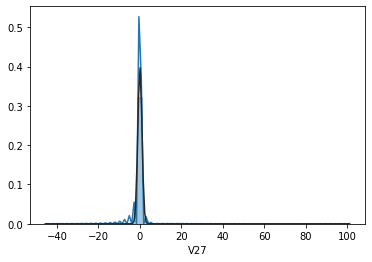

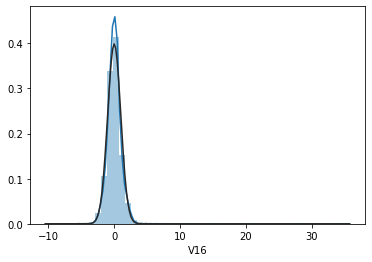

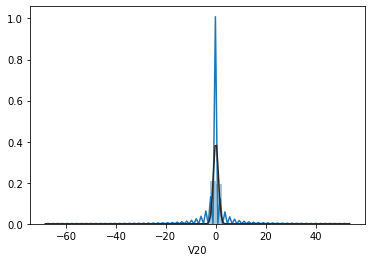

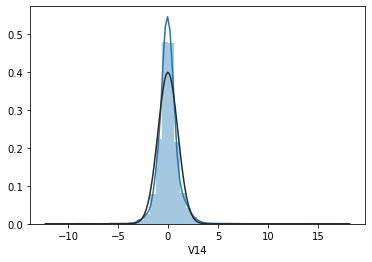

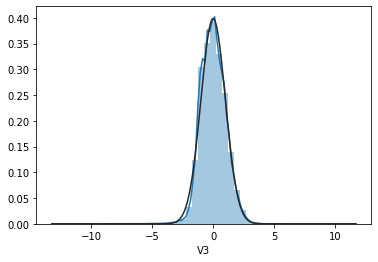

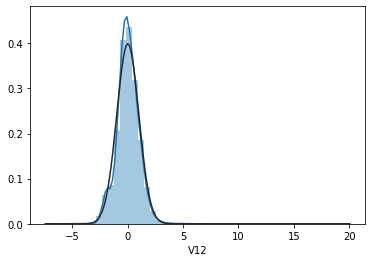

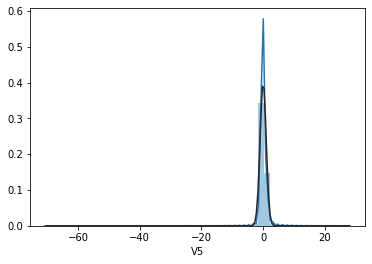

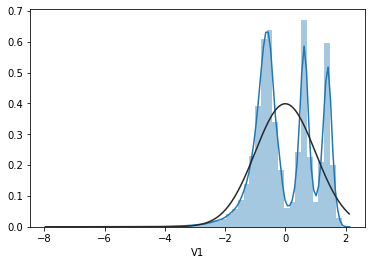

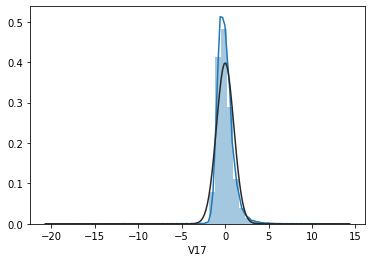

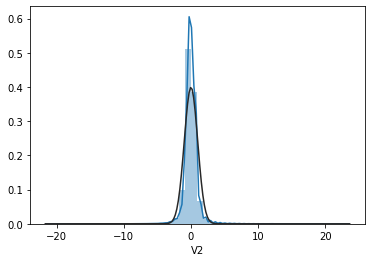

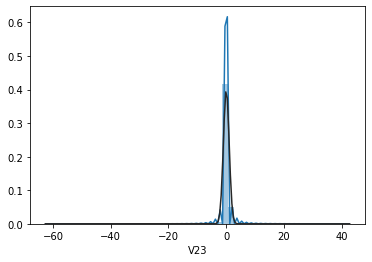

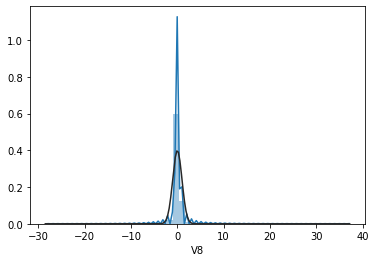

In [24]:
#distplot of the highly skewed features after power transformation
for feat in skewness.index:
    sns.distplot(X_train1[feat], fit=norm)
    plt.show()

### Model building

##### Note on accuracy metric: 
Because the data is highly imbalanced, the accuracy score can not be a good metric to evaluate the model. That is why we have decided to go with the AUC score. Finally after getting the best model, depending on the best AUC, confusion matrix has been calculated

In [25]:
#ROC
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

#### Logistic Regression

In [26]:
#Hyperparameter tuning is not shown explicitely. 
#Beacuse running this notebook in one go with hyperparameter tuning seems practicaly impossible
lr = LogisticRegression(C=0.00021209508879201905, class_weight='balanced',
                   dual=False, fit_intercept=True, intercept_scaling=1,
                   l1_ratio=None, max_iter=100, multi_class='auto', n_jobs=None,
                   penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
                   verbose=0, warm_start=False)

##### Sample code for hyperparameter tuning:
from sklearn.pipeline import Pipeline
<br>
from sklearn import linear_model, decomposition
<br>
logistic = linear_model.LogisticRegression()
<br>
C = np.logspace(-4, 4, 50)
<br>
penalty = ['l1', 'l2']
<br>
parameters = dict(logistic__C=C,logistic__penalty=penalty)
<br>
pipe = Pipeline(steps=[('logistic', logistic)])
<br>
<br>
clf = GridSearchCV(pipe, parameters)
<br>
<br>
clf.fit(X_train, y_train)
<br>
<br>
print('Best Penalty:', clf.best_estimator_.get_params()['logistic__penalty'])
<br>
print('Best C:', clf.best_estimator_.get_params()['logistic__C'])
<br>
print(); print(clf.best_estimator_.get_params()['logistic'])

In [27]:
trained_lr = lr.fit(X_train1, y_train)

In [28]:
pred_lr_train = trained_lr.predict(X_train1)
pred_lr_test = trained_lr.predict(X_test1)
pred_prob_lr_train = trained_lr.predict_proba(X_train1)[:,1]
pred_prob_lr_test = trained_lr.predict_proba(X_test1)[:,1]

accuracy_train = metrics.accuracy_score(y_train, pred_lr_train)
accuracy_test = metrics.accuracy_score(y_test, pred_lr_test)

print('Accuracy in train dataset:', accuracy_train)
print('Accuracy in test dataset:', accuracy_test)

print('Classification report on train dataset:', '\n', classification_report(y_train, pred_lr_train))
print('Classification report on test dataset:', '\n', classification_report(y_test, pred_lr_test))

Accuracy in train dataset: 0.9830411025038952
Accuracy in test dataset: 0.9838137705838981
Classification report on train dataset: 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99    227451
           1       0.08      0.90      0.16       394

    accuracy                           0.98    227845
   macro avg       0.54      0.94      0.57    227845
weighted avg       1.00      0.98      0.99    227845

Classification report on test dataset: 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.09      0.93      0.16        98

    accuracy                           0.98     56962
   macro avg       0.55      0.96      0.58     56962
weighted avg       1.00      0.98      0.99     56962



ROC AUC in train dataset 0.9883564256055418


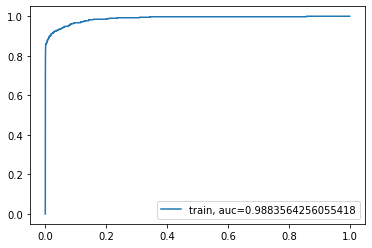

In [29]:
#ROC in train dataset
fpr, tpr, threshold = metrics.roc_curve(y_train, pred_prob_lr_train)
auc = metrics.auc(fpr, tpr)
print("ROC AUC in train dataset", auc)
plt.plot(fpr, tpr, label = "train, auc=" + str(auc))
plt.legend(loc = 4)
plt.show()

ROC AUC in test dataset 0.9712132707613153


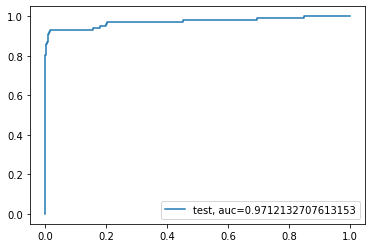

In [30]:
#ROC in test dataset
fpr, tpr, threshold = metrics.roc_curve(y_test, pred_prob_lr_test)
auc = metrics.auc(fpr, tpr)
print("ROC AUC in test dataset", auc)
plt.plot(fpr, tpr, label = "test, auc=" + str(auc))
plt.legend(loc = 4)
plt.show()

#### Random Forest

In [31]:
#Hyperparameter tuning is not shown explicitely. 
#Beacuse running this notebook in one go with hyperparameter tuning seems practicaly impossible
rf_balanced = RandomForestClassifier(n_estimators=100, min_samples_split=5, min_samples_leaf=1, 
                                     class_weight="balanced_subsample", max_leaf_nodes=None, max_features='auto', 
                                     max_depth=6, criterion='gini', ccp_alpha=0.0, bootstrap=True, n_jobs = -1)

##### Sample code for hyperparameter tuning:
rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced')
<br>
<br>params = {'min_samples_split' : [2, 5, 10, 15],
          <br>'min_samples_leaf' : [1, 2, 4, 10],
          <br>'max_features' : ['auto', 'sqrt', 'log2'],
          <br>'bootstrap' : [True, False],
          <br>'max_depth': [2, 4, 7, 10],
          <br>'max_leaf_nodes' : [1, 5, 10, 20, None],
          <br>'criterion' : ['gini', 'entropy'],
          <br>'ccp_alpha' : [0.0, 0.2, 0.8, 1],
          <br>'n_estimators': [100, 250, 500]}
<br>
<br>rf_rscv = RandomizedSearchCV(rf, param_distributions = params,
                             <br>cv = 3, verbose = 3, random_state = 10)
<br>
<br>trained_rf = rf_rscv.fit(X_train1, y_train)

In [32]:
trained_rf = rf_balanced.fit(X_train1, y_train)

In [33]:
pred_rf_train = trained_rf.predict(X_train1)
pred_rf_test = trained_rf.predict(X_test1)
pred_prob_rf_train = trained_rf.predict_proba(X_train1)[:,1]
pred_prob_rf_test = trained_rf.predict_proba(X_test1)[:,1]

accuracy_train = metrics.accuracy_score(y_train, pred_rf_train)
accuracy_test = metrics.accuracy_score(y_test, pred_rf_test)

print('Accuracy in train dataset:', accuracy_train)
print('Accuracy in test dataset:', accuracy_test)

print('Classification report on train dataset:', '\n', classification_report(y_train, pred_rf_train))
print('Classification report on test dataset:', '\n', classification_report(y_test, pred_rf_test))

Accuracy in train dataset: 0.9988764291513967
Accuracy in test dataset: 0.9990695551420246
Classification report on train dataset: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.62      0.92      0.74       394

    accuracy                           1.00    227845
   macro avg       0.81      0.96      0.87    227845
weighted avg       1.00      1.00      1.00    227845

Classification report on test dataset: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.69      0.83      0.75        98

    accuracy                           1.00     56962
   macro avg       0.85      0.91      0.88     56962
weighted avg       1.00      1.00      1.00     56962



ROC AUC in train dataset 0.9990223866368764


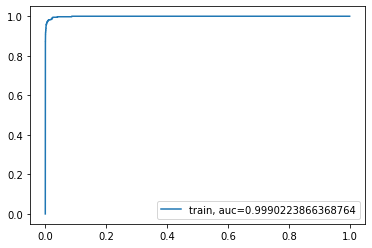

In [34]:
#ROC in train dataset
fpr, tpr, threshold = metrics.roc_curve(y_train, pred_prob_rf_train)
auc = metrics.auc(fpr, tpr)
print("ROC AUC in train dataset", auc)
plt.plot(fpr, tpr, label = "train, auc=" + str(auc))
plt.legend(loc = 4)
plt.show()

ROC AUC in test dataset 0.9779607520413905


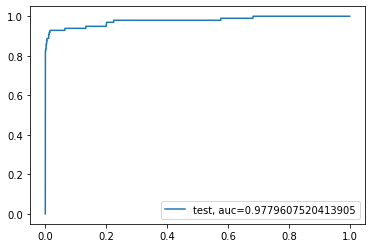

In [35]:
#ROC in test dataset
fpr, tpr, threshold = metrics.roc_curve(y_test, pred_prob_rf_test)
auc = metrics.auc(fpr, tpr)
print("ROC AUC in test dataset", auc)
plt.plot(fpr, tpr, label = "test, auc=" + str(auc))
plt.legend(loc = 4)
plt.show()

#### XGBoost

In [36]:
#Hyperparameter tuning is not shown explicitely. 
#Beacuse running this notebook in one go with hyperparameter tuning seems practicaly impossible
xgb_clf = xgb.XGBClassifier(tree_method = "exact", learning_rate=0.001, n_jobs=-1, eval_metric = "auc", 
                            objective = 'binary:logistic', booster = 'gbtree', scoring='f1_weighted',
                            reg_lambda=1, reg_alpha=1, n_estimators=100, min_child_weight=7, max_depth=7, 
                            gamma=0.3, colsample_bytree=1.0)

##### Sample code for hyperparameter tuning:
xgb_clf = xgb.XGBClassifier(tree_method = "exact", learning_rate=0.001, n_jobs=-1, eval_metric = "auc", 
                            <br>objective = 'binary:logistic', booster = 'gbtree', scoring='f1_weighted')
<br>
<br>params = {'gamma' : [0.1, 0.3, 0.5, 1, 1.5],
          <br>'max_depth': [2, 4, 7, 10],
          <br>'colsample_bytree': [0.3, 0.6, 0.8, 1.0],
          <br>'subsample': [0.2, 0.4, 0.5, 0.6, 0.7],
          <br>'reg_alpha': [0, 0.5, 1],
          <br>'reg_lambda': [1, 1.5, 2, 3, 4.5],
          <br>'min_child_weight': [1, 3, 5, 7],
          <br>'n_estimators': [100, 250, 500, 1000]}
<br>
<br>xgb_rscv = RandomizedSearchCV(xgb_clf, param_distributions = parameters,
                              <br>cv = 4, verbose = 3, random_state = 10)
<br>
<br>trained_xgboost = xgb_rscv.fit(X_train1, y_train)

In [37]:
trained_xgboost = xgb_clf.fit(X_train1, y_train)

In [38]:
preds_xgboost_train = trained_xgboost.predict(X_train1)
preds_xgboost_test = trained_xgboost.predict(X_test1)

accuracy_train = metrics.accuracy_score(y_train, preds_xgboost_train)
accuracy_test = metrics.accuracy_score(y_test, preds_xgboost_test)

print('Accuracy in the train dataset:', accuracy_train)
print('Accuracy in the test dataset:', accuracy_test)

print('Classification report on train dataset:', '\n', classification_report(y_train, preds_xgboost_train))
print('Classification report on test dataset:', '\n', classification_report(y_test, preds_xgboost_test))

Accuracy in the train dataset: 0.9994952709078541
Accuracy in the test dataset: 0.9994382219725431
Classification report on train dataset: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.90      0.79      0.84       394

    accuracy                           1.00    227845
   macro avg       0.95      0.90      0.92    227845
weighted avg       1.00      1.00      1.00    227845

Classification report on test dataset: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.95      0.71      0.81        98

    accuracy                           1.00     56962
   macro avg       0.97      0.86      0.91     56962
weighted avg       1.00      1.00      1.00     56962



ROC AUC in train dataset 0.8958665431972217


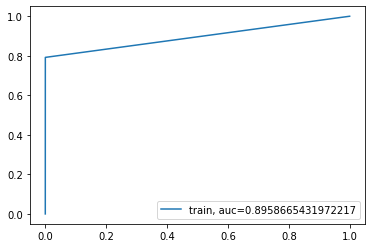

In [39]:
#ROC in train dataset
fpr, tpr, threshold = metrics.roc_curve(y_train, preds_xgboost_train)
auc = metrics.auc(fpr, tpr)
print("ROC AUC in train dataset", auc)
plt.plot(fpr, tpr, label = "train, auc=" + str(auc))
plt.legend(loc = 4)
plt.show()

ROC AUC in train dataset 0.8571076855052657


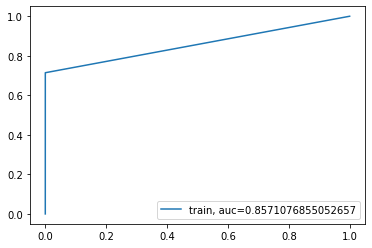

In [40]:
#ROC in test dataset
fpr, tpr, threshold = metrics.roc_curve(y_test, preds_xgboost_test)
auc = metrics.auc(fpr, tpr)
print("ROC AUC in train dataset", auc)
plt.plot(fpr, tpr, label = "train, auc=" + str(auc))
plt.legend(loc = 4)
plt.show()

### Model building with balancing Classes

##### Class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

##### Random Oversampling

In [41]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, y)

In [42]:
X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=9)

#### Logistic Regression

In [43]:
#Hyperparameter tuning is not shown explicitely. 
#Beacuse running this notebook in one go with hyperparameter tuning seems practicaly impossible
lr_over = LogisticRegression(C=0.019306977288832496, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [44]:
trained_lr_over = lr_over.fit(X_train_over, y_train_over)

In [45]:
pred_lr_train_over = trained_lr_over.predict(X_train_over)
pred_lr_test_over = trained_lr_over.predict(X_test_over)
pred_prob_lr_train_over = trained_lr_over.predict_proba(X_train_over)[:,1]
pred_prob_lr_test_over = trained_lr_over.predict_proba(X_test_over)[:,1]

accuracy_train = metrics.accuracy_score(y_train_over, pred_lr_train_over)
accuracy_test = metrics.accuracy_score(y_test_over, pred_lr_test_over)

print('Accuracy in train dataset:', accuracy_train)
print('Accuracy in test dataset:', accuracy_test)

print('Classification report on train dataset:', '\n', classification_report(y_train_over, pred_lr_train_over))
print('Classification report on test dataset:', '\n', classification_report(y_test_over, pred_lr_test_over))

Accuracy in train dataset: 0.9504269032587095
Accuracy in test dataset: 0.9499850517911471
Classification report on train dataset: 
               precision    recall  f1-score   support

           0       0.93      0.98      0.95    227537
           1       0.98      0.92      0.95    227367

    accuracy                           0.95    454904
   macro avg       0.95      0.95      0.95    454904
weighted avg       0.95      0.95      0.95    454904

Classification report on test dataset: 
               precision    recall  f1-score   support

           0       0.93      0.98      0.95     56778
           1       0.98      0.92      0.95     56948

    accuracy                           0.95    113726
   macro avg       0.95      0.95      0.95    113726
weighted avg       0.95      0.95      0.95    113726



ROC AUC in train dataset 0.9871242087256475


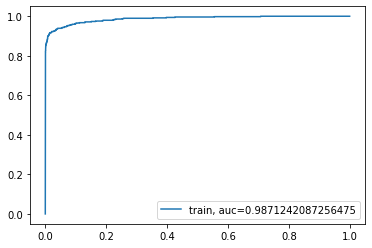

In [46]:
#ROC in train dataset
fpr, tpr, threshold = metrics.roc_curve(y_train_over, pred_prob_lr_train_over)
auc = metrics.auc(fpr, tpr)
print("ROC AUC in train dataset", auc)
plt.plot(fpr, tpr, label = "train, auc=" + str(auc))
plt.legend(loc = 4)
plt.show()

ROC AUC in test dataset 0.9866747151518406


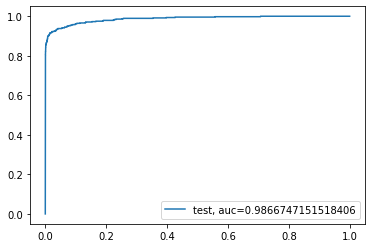

In [47]:
#ROC in test dataset
fpr, tpr, threshold = metrics.roc_curve(y_test_over, pred_prob_lr_test_over)
auc = metrics.auc(fpr, tpr)
print("ROC AUC in test dataset", auc)
plt.plot(fpr, tpr, label = "test, auc=" + str(auc))
plt.legend(loc = 4)
plt.show()

#### Random Forest

In [48]:
#Hyperparameter tuning is not shown explicitely. 
#Beacuse running this notebook in one go with hyperparameter tuning seems practicaly impossible
rf_over = RandomForestClassifier(n_estimators=100, min_samples_split=5, min_samples_leaf=1, 
                               max_leaf_nodes=None, max_features='auto', max_depth=6, criterion='gini', 
                               ccp_alpha=0.0, bootstrap=True, n_jobs = -1)

In [49]:
trained_rf_over = rf_over.fit(X_train_over, y_train_over)

In [50]:
pred_rf_train_over = trained_rf_over.predict(X_train_over)
pred_rf_test_over = trained_rf_over.predict(X_test_over)
pred_prob_rf_train_over = trained_rf_over.predict_proba(X_train_over)[:,1]
pred_prob_rf_test_over = trained_rf_over.predict_proba(X_test_over)[:,1]

accuracy_train = metrics.accuracy_score(y_train_over, pred_rf_train_over)
accuracy_test = metrics.accuracy_score(y_test_over, pred_rf_test_over)

print('Accuracy in train dataset:', accuracy_train)
print('Accuracy in test dataset:', accuracy_test)

print('Classification report on train dataset:', '\n', classification_report(y_train_over, pred_rf_train_over))
print('Classification report on test dataset:', '\n', classification_report(y_test_over, pred_rf_test_over))

Accuracy in train dataset: 0.964546365826636
Accuracy in test dataset: 0.9638780929602729
Classification report on train dataset: 
               precision    recall  f1-score   support

           0       0.94      1.00      0.97    227537
           1       1.00      0.93      0.96    227367

    accuracy                           0.96    454904
   macro avg       0.97      0.96      0.96    454904
weighted avg       0.97      0.96      0.96    454904

Classification report on test dataset: 
               precision    recall  f1-score   support

           0       0.93      1.00      0.97     56778
           1       1.00      0.93      0.96     56948

    accuracy                           0.96    113726
   macro avg       0.97      0.96      0.96    113726
weighted avg       0.97      0.96      0.96    113726



ROC AUC in train dataset 0.9966475600572741


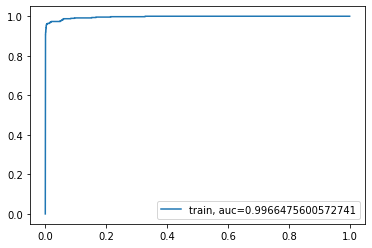

In [51]:
#ROC in train dataset
fpr, tpr, threshold = metrics.roc_curve(y_train_over, pred_prob_rf_train_over)
auc = metrics.auc(fpr, tpr)
print("ROC AUC in train dataset", auc)
plt.plot(fpr, tpr, label = "train, auc=" + str(auc))
plt.legend(loc = 4)
plt.show()

ROC AUC in test dataset 0.9966033169638815


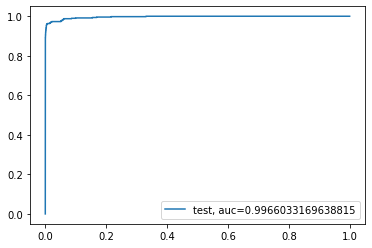

In [52]:
#ROC in test dataset
fpr, tpr, threshold = metrics.roc_curve(y_test_over, pred_prob_rf_test_over)
auc = metrics.auc(fpr, tpr)
print("ROC AUC in test dataset", auc)
plt.plot(fpr, tpr, label = "test, auc=" + str(auc))
plt.legend(loc = 4)
plt.show()

#### XGBoost

In [53]:
#Hyperparameter tuning is not show explicitely. 
#Beacuse running this notebook in one go with hyperparameter tuning seems practicaly impossible
xgb_clf_over = xgb.XGBClassifier(tree_method = "exact", learning_rate=0.001, n_jobs=-1, eval_metric = "auc", 
                            objective = 'binary:logistic', booster = 'gbtree', scoring='f1_weighted',
                            reg_lambda=1, reg_alpha=1, n_estimators=100, min_child_weight=7, max_depth=10, 
                            gamma=0.3, colsample_bytree=1.0)

In [54]:
trained_xgboost_over = xgb_clf_over.fit(X_train_over,y_train_over)

In [55]:
preds_xgboost_train_over = trained_xgboost_over.predict(X_train_over)
preds_xgboost_test_over = trained_xgboost_over.predict(X_test_over)

accuracy_train = metrics.accuracy_score(y_train_over, preds_xgboost_train_over)
accuracy_test = metrics.accuracy_score(y_test_over, preds_xgboost_test_over)

print('Accuracy in the train dataset:', accuracy_train)
print('Accuracy in the test dataset:', accuracy_test)

print('Classification report on train dataset:', '\n', classification_report(y_train_over, preds_xgboost_train_over))
print('Classification report on test dataset:', '\n', classification_report(y_test_over, preds_xgboost_test_over))

Accuracy in the train dataset: 0.9963860506832211
Accuracy in the test dataset: 0.9959376044176353
Classification report on train dataset: 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00    227537
           1       0.99      1.00      1.00    227367

    accuracy                           1.00    454904
   macro avg       1.00      1.00      1.00    454904
weighted avg       1.00      1.00      1.00    454904

Classification report on test dataset: 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     56778
           1       0.99      1.00      1.00     56948

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



ROC AUC in train dataset 0.9963874007304306


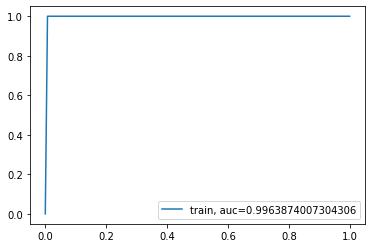

In [56]:
#ROC in train dataset
fpr, tpr, threshold = metrics.roc_curve(y_train_over, preds_xgboost_train_over)
auc = metrics.auc(fpr, tpr)
print("ROC AUC in train dataset", auc)
plt.plot(fpr, tpr, label = "train, auc=" + str(auc))
plt.legend(loc = 4)
plt.show()

ROC AUC in train dataset 0.995931522772905


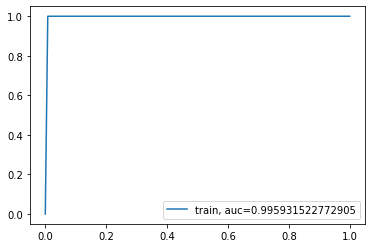

In [57]:
#ROC in test dataset
fpr, tpr, threshold = metrics.roc_curve(y_test_over, preds_xgboost_test_over)
auc = metrics.auc(fpr, tpr)
print("ROC AUC in train dataset", auc)
plt.plot(fpr, tpr, label = "train, auc=" + str(auc))
plt.legend(loc = 4)
plt.show()

##### SMOTE 

In [58]:
from imblearn.over_sampling import SMOTE
st = SMOTE(random_state=100)
X_resampled, y_resampled = st.fit_resample(X, y)

In [59]:
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=9)

#### Logistic Regression

In [60]:
#Hyperparameter tuning is not show explicitely. 
#Beacuse running this notebook in one go with hyperparameter tuning seems practicaly impossible
lr_sm = LogisticRegression(C=339.3221771895323, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [61]:
trained_lr_sm = lr_sm.fit(X_train_sm, y_train_sm)

In [62]:
pred_lr_train_sm = trained_lr_sm.predict(X_train_sm)
pred_lr_test_sm = trained_lr_sm.predict(X_test_sm)
pred_prob_lr_train_sm = trained_lr_sm.predict_proba(X_train_sm)[:,1]
pred_prob_lr_test_sm = trained_lr_sm.predict_proba(X_test_sm)[:,1]

accuracy_train = metrics.accuracy_score(y_train_sm, pred_lr_train_sm)
accuracy_test = metrics.accuracy_score(y_test_sm, pred_lr_test_sm)

print('Accuracy in train dataset:', accuracy_train)
print('Accuracy in test dataset:', accuracy_test)

print('Classification report on train dataset:', '\n', classification_report(y_train_sm, pred_lr_train_sm))
print('Classification report on test dataset:', '\n', classification_report(y_test_sm, pred_lr_test_sm))

Accuracy in train dataset: 0.948184671930781
Accuracy in test dataset: 0.9472152366213531
Classification report on train dataset: 
               precision    recall  f1-score   support

           0       0.92      0.98      0.95    227537
           1       0.97      0.92      0.95    227367

    accuracy                           0.95    454904
   macro avg       0.95      0.95      0.95    454904
weighted avg       0.95      0.95      0.95    454904

Classification report on test dataset: 
               precision    recall  f1-score   support

           0       0.92      0.98      0.95     56778
           1       0.97      0.92      0.95     56948

    accuracy                           0.95    113726
   macro avg       0.95      0.95      0.95    113726
weighted avg       0.95      0.95      0.95    113726



ROC AUC in train dataset 0.9894446948860023


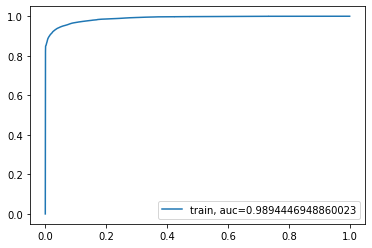

In [63]:
#ROC in train dataset
fpr, tpr, threshold = metrics.roc_curve(y_train_sm, pred_prob_lr_train_sm)
auc = metrics.auc(fpr, tpr)
print("ROC AUC in train dataset", auc)
plt.plot(fpr, tpr, label = "train, auc=" + str(auc))
plt.legend(loc = 4)
plt.show()

ROC AUC in test dataset 0.9895509998890503


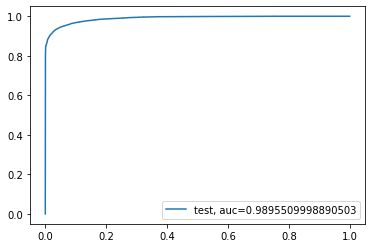

In [64]:
#ROC in test dataset
fpr, tpr, threshold = metrics.roc_curve(y_test_sm, pred_prob_lr_test_sm)
auc = metrics.auc(fpr, tpr)
print("ROC AUC in test dataset", auc)
plt.plot(fpr, tpr, label = "test, auc=" + str(auc))
plt.legend(loc = 4)
plt.show()

#### Random Forest

In [65]:
#Hyperparameter tuning is not show explicitely. 
#Beacuse running this notebook in one go with hyperparameter tuning seems practicaly impossible
rf_sm = RandomForestClassifier(n_estimators=100, min_samples_split=15, min_samples_leaf=4, 
                               max_leaf_nodes=20, max_features='log2', max_depth=7, criterion='entropy', 
                               ccp_alpha=0.0, bootstrap=False, n_jobs = -1)

In [66]:
trained_rf_sm = rf_sm.fit(X_train_sm, y_train_sm)

In [67]:
pred_rf_train_sm = trained_rf_sm.predict(X_train_sm)
pred_rf_test_sm = trained_rf_sm.predict(X_test_sm)
pred_prob_rf_train_sm = trained_rf_sm.predict_proba(X_train_sm)[:,1]
pred_prob_rf_test_sm = trained_rf_sm.predict_proba(X_test_sm)[:,1]

accuracy_train = metrics.accuracy_score(y_train_sm, pred_rf_train_sm)
accuracy_test = metrics.accuracy_score(y_test_sm, pred_rf_test_sm)

print('Accuracy in train dataset:', accuracy_train)
print('Accuracy in test dataset:', accuracy_test)

print('Classification report on train dataset:', '\n', classification_report(y_train_sm, pred_rf_train_sm))
print('Classification report on test dataset:', '\n', classification_report(y_test_sm, pred_rf_test_sm))

Accuracy in train dataset: 0.94238124967026
Accuracy in test dataset: 0.9418162953062624
Classification report on train dataset: 
               precision    recall  f1-score   support

           0       0.90      1.00      0.95    227537
           1       0.99      0.89      0.94    227367

    accuracy                           0.94    454904
   macro avg       0.95      0.94      0.94    454904
weighted avg       0.95      0.94      0.94    454904

Classification report on test dataset: 
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     56778
           1       0.99      0.89      0.94     56948

    accuracy                           0.94    113726
   macro avg       0.95      0.94      0.94    113726
weighted avg       0.95      0.94      0.94    113726



ROC AUC in train dataset 0.9927908653065503


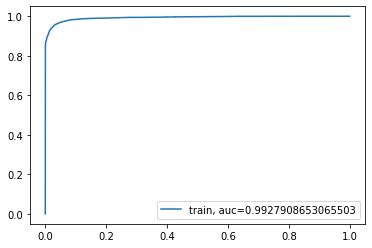

In [68]:
#ROC in train dataset
fpr, tpr, threshold = metrics.roc_curve(y_train_sm, pred_prob_rf_train_sm)
auc = metrics.auc(fpr, tpr)
print("ROC AUC in train dataset", auc)
plt.plot(fpr, tpr, label = "train, auc=" + str(auc))
plt.legend(loc = 4)
plt.show()

ROC AUC in test dataset 0.9927809948951887


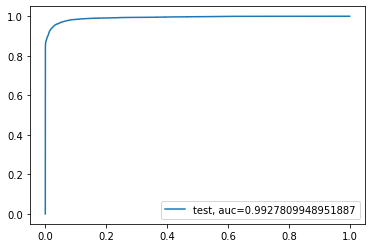

In [69]:
#ROC in test dataset
fpr, tpr, threshold = metrics.roc_curve(y_test_sm, pred_prob_rf_test_sm)
auc = metrics.auc(fpr, tpr)
print("ROC AUC in test dataset", auc)
plt.plot(fpr, tpr, label = "test, auc=" + str(auc))
plt.legend(loc = 4)
plt.show()

#### XGBoost

In [70]:
#Hyperparameter tuning is not shown explicitely. 
#Beacuse running this notebook in one go with hyperparameter tuning seems practicaly impossible
xgb_clf_sm = xgb.XGBClassifier(tree_method = "exact", learning_rate=0.001, n_jobs=-1, eval_metric = "auc", 
                            objective = 'binary:logistic', booster = 'gbtree', scoring='f1_weighted',
                            reg_lambda=1, reg_alpha=1, n_estimators=100, min_child_weight=7, max_depth=10, 
                            gamma=0.3, colsample_bytree=1.0)

In [71]:
trained_xgboost_sm = xgb_clf_sm.fit(X_train_sm,y_train_sm)

In [72]:
preds_xgboost_train_sm = trained_xgboost_sm.predict(X_train_sm)
preds_xgboost_test_sm = trained_xgboost_sm.predict(X_test_sm)

accuracy_train = metrics.accuracy_score(y_train_sm, preds_xgboost_train_sm)
accuracy_test = metrics.accuracy_score(y_test_sm, preds_xgboost_test_sm)

print('Accuracy in the train dataset:', accuracy_train)
print('Accuracy in the test dataset:', accuracy_test)

print('Classification report on train dataset:', '\n', classification_report(y_train_sm, preds_xgboost_train_sm))
print('Classification report on test dataset:', '\n', classification_report(y_test_sm, preds_xgboost_test_sm))

Accuracy in the train dataset: 0.9889031531927616
Accuracy in the test dataset: 0.9877512618046884
Classification report on train dataset: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99    227537
           1       0.99      0.99      0.99    227367

    accuracy                           0.99    454904
   macro avg       0.99      0.99      0.99    454904
weighted avg       0.99      0.99      0.99    454904

Classification report on test dataset: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     56778
           1       0.99      0.99      0.99     56948

    accuracy                           0.99    113726
   macro avg       0.99      0.99      0.99    113726
weighted avg       0.99      0.99      0.99    113726



ROC AUC in train dataset 0.988902313709353


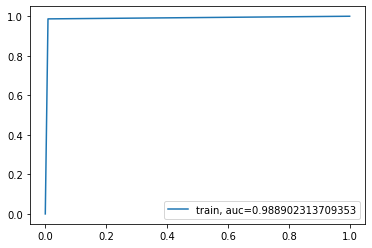

In [73]:
#ROC in train dataset
fpr, tpr, threshold = metrics.roc_curve(y_train_sm, preds_xgboost_train_sm)
auc = metrics.auc(fpr, tpr)
print("ROC AUC in train dataset", auc)
plt.plot(fpr, tpr, label = "train, auc=" + str(auc))
plt.legend(loc = 4)
plt.show()

ROC AUC in train dataset 0.9877547176175099


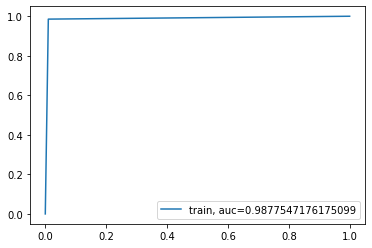

In [74]:
#ROC in test dataset
fpr, tpr, threshold = metrics.roc_curve(y_test_sm, preds_xgboost_test_sm)
auc = metrics.auc(fpr, tpr)
print("ROC AUC in train dataset", auc)
plt.plot(fpr, tpr, label = "train, auc=" + str(auc))
plt.legend(loc = 4)
plt.show()

##### AdaSyn

In [75]:
from imblearn.over_sampling import ADASYN
Adasyn= ADASYN(random_state=100)
X_resampled, y_resampled = Adasyn.fit_resample(X, y)

In [76]:
X_train_ada, X_test_ada, y_train_ada, y_test_ada = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=9)

#### Logistic Regression

In [77]:
#Hyperparameter tuning is not show explicitely. 
#Beacuse running this notebook in one go with hyperparameter tuning seems practicaly impossible
lr_ada = LogisticRegression(C=16.768329368110066, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [78]:
trained_lr_ada = lr_ada.fit(X_train_ada, y_train_ada)

In [79]:
pred_lr_train_ada = trained_lr_ada.predict(X_train_ada)
pred_lr_test_ada = trained_lr_ada.predict(X_test_ada)
pred_prob_lr_train_ada = trained_lr_ada.predict_proba(X_train_ada)[:,1]
pred_prob_lr_test_ada = trained_lr_sm.predict_proba(X_test_ada)[:,1]

accuracy_train = metrics.accuracy_score(y_train_ada, pred_lr_train_ada)
accuracy_test = metrics.accuracy_score(y_test_ada, pred_lr_test_ada)

print('Accuracy in train dataset:', accuracy_train)
print('Accuracy in test dataset:', accuracy_test)

print('Classification report on train dataset:', '\n', classification_report(y_train_ada, pred_lr_train_ada))
print('Classification report on test dataset:', '\n', classification_report(y_test_ada, pred_lr_test_ada))

Accuracy in train dataset: 0.8864333825753579
Accuracy in test dataset: 0.8867619256979556
Classification report on train dataset: 
               precision    recall  f1-score   support

           0       0.87      0.91      0.89    227490
           1       0.90      0.87      0.88    227406

    accuracy                           0.89    454896
   macro avg       0.89      0.89      0.89    454896
weighted avg       0.89      0.89      0.89    454896

Classification report on test dataset: 
               precision    recall  f1-score   support

           0       0.87      0.90      0.89     56825
           1       0.90      0.87      0.88     56900

    accuracy                           0.89    113725
   macro avg       0.89      0.89      0.89    113725
weighted avg       0.89      0.89      0.89    113725



ROC AUC in train dataset 0.9601277813846143


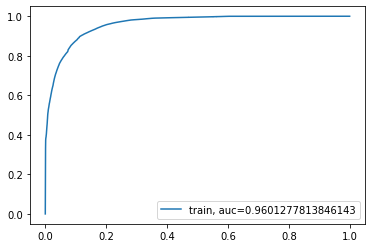

In [80]:
#ROC in train dataset
fpr, tpr, threshold = metrics.roc_curve(y_train_ada, pred_prob_lr_train_ada)
auc = metrics.auc(fpr, tpr)
print("ROC AUC in train dataset", auc)
plt.plot(fpr, tpr, label = "train, auc=" + str(auc))
plt.legend(loc = 4)
plt.show()

ROC AUC in test dataset 0.9555166950299884


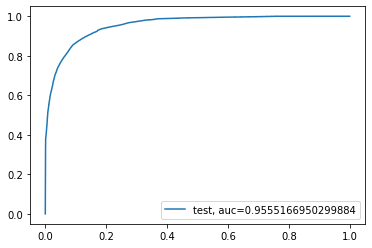

In [81]:
#ROC in test dataset
fpr, tpr, threshold = metrics.roc_curve(y_test_ada, pred_prob_lr_test_ada)
auc = metrics.auc(fpr, tpr)
print("ROC AUC in test dataset", auc)
plt.plot(fpr, tpr, label = "test, auc=" + str(auc))
plt.legend(loc = 4)
plt.show()

#### Random Forest

In [82]:
#Hyperparameter tuning is not show explicitely. 
#Beacuse running this notebook in one go with hyperparameter tuning seems practicaly impossible
rf_ada = RandomForestClassifier(n_estimators=100, min_samples_split=15, min_samples_leaf=4, 
                               max_leaf_nodes=20, max_features='log2', max_depth=15, criterion='entropy', 
                               ccp_alpha=0.0, bootstrap=False, n_jobs = -1)

In [83]:
trained_rf_ada = rf_ada.fit(X_train_ada, y_train_ada)

In [84]:
pred_rf_train_ada = trained_rf_ada.predict(X_train_ada)
pred_rf_test_ada = trained_rf_ada.predict(X_test_ada)
pred_prob_rf_train_ada = trained_rf_ada.predict_proba(X_train_ada)[:,1]
pred_prob_rf_test_ada = trained_rf_ada.predict_proba(X_test_ada)[:,1]

accuracy_train = metrics.accuracy_score(y_train_ada, pred_rf_train_ada)
accuracy_test = metrics.accuracy_score(y_test_ada, pred_rf_test_ada)

print('Accuracy in train dataset:', accuracy_train)
print('Accuracy in test dataset:', accuracy_test)

print('Classification report on train dataset:', '\n', classification_report(y_train_ada, pred_rf_train_ada))
print('Classification report on test dataset:', '\n', classification_report(y_test_ada, pred_rf_test_ada))

Accuracy in train dataset: 0.932753860222996
Accuracy in test dataset: 0.9321169487799517
Classification report on train dataset: 
               precision    recall  f1-score   support

           0       0.92      0.94      0.93    227490
           1       0.94      0.92      0.93    227406

    accuracy                           0.93    454896
   macro avg       0.93      0.93      0.93    454896
weighted avg       0.93      0.93      0.93    454896

Classification report on test dataset: 
               precision    recall  f1-score   support

           0       0.92      0.94      0.93     56825
           1       0.94      0.92      0.93     56900

    accuracy                           0.93    113725
   macro avg       0.93      0.93      0.93    113725
weighted avg       0.93      0.93      0.93    113725



ROC AUC in train dataset 0.9842317952826664


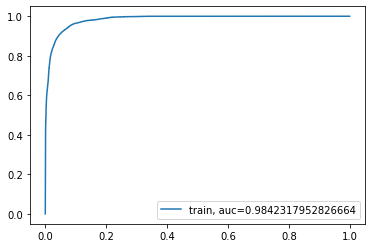

In [85]:
#ROC in train dataset
fpr, tpr, threshold = metrics.roc_curve(y_train_ada, pred_prob_rf_train_ada)
auc = metrics.auc(fpr, tpr)
print("ROC AUC in train dataset", auc)
plt.plot(fpr, tpr, label = "train, auc=" + str(auc))
plt.legend(loc = 4)
plt.show()

ROC AUC in test dataset 0.9838796601349842


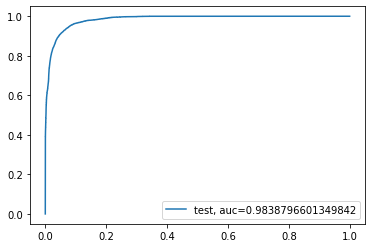

In [86]:
#ROC in test dataset
fpr, tpr, threshold = metrics.roc_curve(y_test_ada, pred_prob_rf_test_ada)
auc = metrics.auc(fpr, tpr)
print("ROC AUC in test dataset", auc)
plt.plot(fpr, tpr, label = "test, auc=" + str(auc))
plt.legend(loc = 4)
plt.show()

#### XGBoost

In [87]:
#Hyperparameter tuning is not shown explicitely. 
#Beacuse running this notebook in one go with hyperparameter tuning seems practicaly impossible
xgb_clf_ada = xgb.XGBClassifier(tree_method = "exact", learning_rate=0.001, n_jobs=-1, eval_metric = "auc", 
                            objective = 'binary:logistic', booster = 'gbtree', scoring='f1_weighted',
                            reg_lambda=1, reg_alpha=1, n_estimators=100, min_child_weight=7, max_depth=15, 
                            gamma=0.3, colsample_bytree=1.0)

In [88]:
trained_xgboost_ada = xgb_clf_ada.fit(X_train_ada,y_train_ada)

In [89]:
preds_xgboost_train_ada = trained_xgboost_ada.predict(X_train_ada)
preds_xgboost_test_ada = trained_xgboost_ada.predict(X_test_ada)

accuracy_train = metrics.accuracy_score(y_train_ada, preds_xgboost_train_ada)
accuracy_test = metrics.accuracy_score(y_test_ada, preds_xgboost_test_ada)

print('Accuracy in the train dataset:', accuracy_train)
print('Accuracy in the test dataset:', accuracy_test)

print('Classification report on train dataset:', '\n', classification_report(y_train_ada, preds_xgboost_train_ada))
print('Classification report on test dataset:', '\n', classification_report(y_test_ada, preds_xgboost_test_ada))

Accuracy in the train dataset: 0.9906396187260385
Accuracy in the test dataset: 0.9899670257199384
Classification report on train dataset: 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99    227490
           1       0.98      1.00      0.99    227406

    accuracy                           0.99    454896
   macro avg       0.99      0.99      0.99    454896
weighted avg       0.99      0.99      0.99    454896

Classification report on test dataset: 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     56825
           1       0.98      1.00      0.99     56900

    accuracy                           0.99    113725
   macro avg       0.99      0.99      0.99    113725
weighted avg       0.99      0.99      0.99    113725



ROC AUC in train dataset 0.9906410960053879


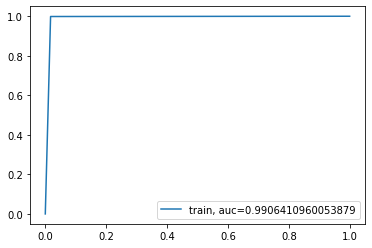

In [90]:
#ROC in train dataset
fpr, tpr, threshold = metrics.roc_curve(y_train_ada, preds_xgboost_train_ada)
auc = metrics.auc(fpr, tpr)
print("ROC AUC in train dataset", auc)
plt.plot(fpr, tpr, label = "train, auc=" + str(auc))
plt.legend(loc = 4)
plt.show()

ROC AUC in train dataset 0.9899613905733772


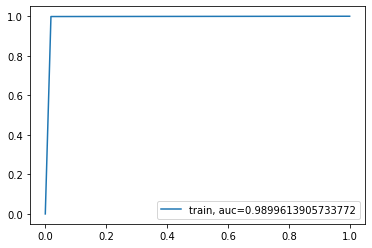

In [91]:
#ROC in test dataset
fpr, tpr, threshold = metrics.roc_curve(y_test_ada, preds_xgboost_test_ada)
auc = metrics.auc(fpr, tpr)
print("ROC AUC in train dataset", auc)
plt.plot(fpr, tpr, label = "train, auc=" + str(auc))
plt.legend(loc = 4)
plt.show()

### Conclusion:

#### The best model we got using XGBoost with oversampled data

* Below are the accuracy, AUC and Threshold of the best model

In [92]:
preds_xgboost_train_over = trained_xgboost_over.predict(X_train_over)
preds_xgboost_test = trained_xgboost_over.predict(X_test)

pred_prob_xgboost_train_over = trained_xgboost_over.predict_proba(X_train_over)[:,1]
pred_prob_xgboost_test = trained_xgboost_over.predict_proba(X_test)[:,1]

accuracy_train = metrics.accuracy_score(y_train_over, preds_xgboost_train_over)
accuracy_test = metrics.accuracy_score(y_test, preds_xgboost_test)

print('Accuracy in the train dataset:', accuracy_train)
print('Accuracy in the test dataset:', accuracy_test)

fpr, tpr, threshold = metrics.roc_curve(y_train_over, pred_prob_xgboost_train_over)
auc = metrics.auc(fpr, tpr)
print("ROC AUC in train dataset", auc)

threshold = threshold[np.argmax(tpr-fpr)]
print('Threshold:', threshold)

fpr, tpr, threshold = metrics.roc_curve(y_test, preds_xgboost_test)
auc = metrics.auc(fpr, tpr)
print("ROC AUC in test dataset", auc)

Accuracy in the train dataset: 0.9963860506832211
Accuracy in the test dataset: 0.9928197745865665
ROC AUC in train dataset 0.9995835772061725
Threshold: 0.53191495
ROC AUC in test dataset 0.9964037000562745


#### Printing the important features of the best model to understand the dataset

Top var = 15
2nd Top var = 5
3rd Top var = 9


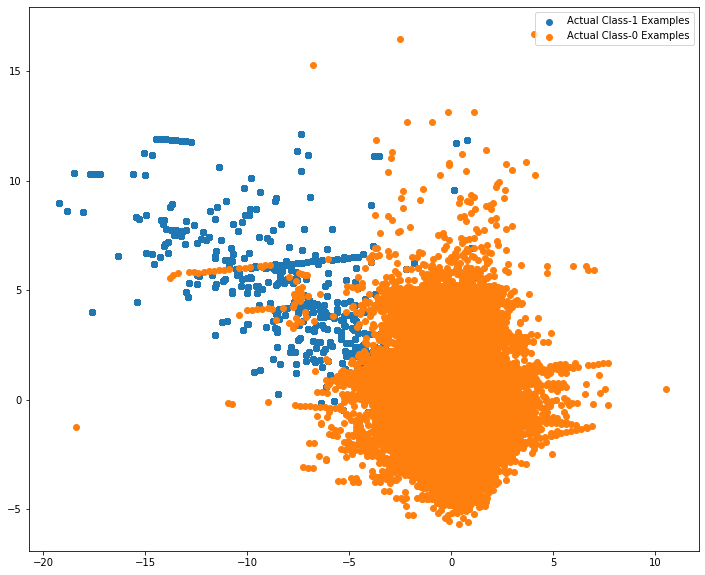

In [93]:
var_imp = []
for i in trained_xgboost_over.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(trained_xgboost_over.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(trained_xgboost_over.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(trained_xgboost_over.feature_importances_)[-3])+1)

# Variable on Index-15 and Index-5 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(trained_xgboost_over.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(trained_xgboost_over.feature_importances_)[-2])

X_train_1 = X_train_over.to_numpy()[np.where(y_train_over==1.0)]
X_train_0 = X_train_over.to_numpy()[np.where(y_train_over==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 10]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

#### Cost-Benefit Analysis in train dataset (oversampled dataset)

In [94]:
# Confusion matrix
y_final = pd.DataFrame()
y_final['real'] = y_train_over
y_final['pred'] = pred_prob_xgboost_train_over
y_final['pred'] = y_final.pred.map( lambda x: 1 if x > 0.53191495 else 0)
confusion = metrics.confusion_matrix(y_final.real, y_final.pred)
confusion

array([[226915,    622],
       [  1380, 225987]], dtype=int64)

In [95]:
TP = confusion[1,1] #true positive 
TN = confusion[0,0] #true negative
FP = confusion[0,1] #false positive
FN = confusion[1,0] #false negative

print('Sensitivity:', TP/float(TP+FN))
print('Specificity:', TN/float(TN+FP))
print('False Postive Rate:', FP/float(TN+FP))
print('Positive Predictive Value:', TP/float(TP+FP))
print('Negative Predictive Value:',TN/float(TN+ FN))
print('Misclassification Rate:', (FN+FP)/(TP+TN+FP+FN))

Sensitivity: 0.9939305176212907
Specificity: 0.9972663786549001
False Postive Rate: 0.0027336213450999177
Positive Predictive Value: 0.9972551840394689
Negative Predictive Value: 0.9939551895573709
Misclassification Rate: 0.004400928547561684


##### After finding the best evaluation score on the test data, you have to find how much cost you are saving from the final predictive model.

* From your confusion matrix, find total fraud predictions that the model has made (TP + FP).
* For all the predictions, the bank has to call to verify whether the prediction was right or not. (Take ₹ 10/call for the bank)
* The savings will be the total amount of correct predictions made: TP x Cost of each transaction which is correctly predicted.
* The loss will be the total amount of incorrect predictions made: FN x Cost of each transaction which is incorrectly predicted.
* So the total savings= (TP x cost of each transaction (correct predictions) -[ (TP+FP) x 10 + FN x Cost of all transactions (incorrect predictions)] )

In [96]:
#Assumption: Average cost of each transaction is ₹5L
print('Total fraud predictions:', TP+FP)
print('Total savings by correct predictions:', TP*500000)
print('Total loss due to incorrect predictions:', FN*500000)
print('Total savings:', TP*500000 - ((TP+FP)*10 + FN*500000))

Total fraud predictions: 226609
Total savings by correct predictions: 112993500000
Total loss due to incorrect predictions: 690000000
Total savings: 112301233910


#### So, assuming the cost of each transaction as ₹5L, the model can save ₹11230 cr

#### Cost-Benefit Analysis in test dataset (original dataset)

In [97]:
# Confusion matrix
y_final = pd.DataFrame()
y_final['real'] = y_test
y_final['pred'] = pred_prob_xgboost_test
y_final['pred'] = y_final.pred.map( lambda x: 1 if x > 0.53191495 else 0)
confusion = metrics.confusion_matrix(y_final.real, y_final.pred)
confusion

array([[56706,   158],
       [    1,    97]], dtype=int64)

In [98]:
TP = confusion[1,1] #true positive 
TN = confusion[0,0] #true negative
FP = confusion[0,1] #false positive
FN = confusion[1,0] #false negative

print('Sensitivity:', TP/float(TP+FN))
print('Specificity:', TN/float(TN+FP))
print('False Postive Rate:', FP/float(TN+FP))
print('Positive Predictive Value:', TP/float(TP+FP))
print('Negative Predictive Value:',TN/float(TN+ FN))
print('Misclassification Rate:', (FN+FP)/(TP+TN+FP+FN))

Sensitivity: 0.9897959183673469
Specificity: 0.9972214406302757
False Postive Rate: 0.0027785593697242546
Positive Predictive Value: 0.3803921568627451
Negative Predictive Value: 0.9999823654927963
Misclassification Rate: 0.0027913345739264774


In [99]:
#Assumption: Average cost of each transaction is ₹5L
print('Total fraud predictions:', TP+FP)
print('Total savings by correct predictions:', TP*500000)
print('Total loss due to incorrect predictions:', FN*500000)
print('Total savings:', TP*500000 - ((TP+FP)*10 + FN*500000))

Total fraud predictions: 255
Total savings by correct predictions: 48500000
Total loss due to incorrect predictions: 500000
Total savings: 47997450


#### So, assuming the cost of each transaction as ₹5L, the model can save ₹4.8 cr